In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from my_info import *
from datetime import date
import matplotlib.pyplot as plt

/Users/mattg/Personal Projects/2024_forecast/my_info.py:15: DtypeWarning: Columns (15,16,22,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  pres_polls_2020_df = pd.read_csv(data_path + 'pres_polls_2020.csv')
/Users/mattg/Personal Projects/2024_forecast/my_info.py:21: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,1

In [2]:
'''
To pick an appropriate alpha value, consider doing this for the 2020 presidential
polling and comparing different alpha values to 538 pres avg over time, pick the alpha
that gives the closest graph to 538
'''

def format_for_ewma(df, cand_num, state=None, date_op='start_date'):
    candidate_names = ['Joe Biden', 'Donald Trump']
    
    ## Formatt dates
    df['start_date'] = pd.to_datetime(df['start_date'])
    df['end_date'] = pd.to_datetime(df['end_date'])

    ## Filter polls by specified candidate and state
    df = df[df['candidate_name'] == candidate_names[cand_num]]
    if state is not None:
        ## fix code to filter for specific state
        pass
    else:
        ## filter for national polls
        df = df[df['state'].isna()]
    
    ## Group polls by date and find mean of polls on start_date
    '''
    consider grouping by poll_id and taking the higher pct of that poll_id since the higher poll usually means there are less candidates to choose from
    won't necessarily mean the options are the two candidates you want
    '''
    df['mean_pct'] = df.groupby(date_op)['pct'].transform('mean')
    df = df.drop_duplicates(date_op)
    
    return df
    

## collect and format both candidates polling averages for the ewma
cols = ['start_date', 'end_date', 'candidate_name', 'pct', 'mean_pct']
biden = format_for_ewma(pres_polls_2024_df, 0)
trump = format_for_ewma(pres_polls_2024_df, 1)
biden = biden[cols]
trump = trump[cols]

## sort by start_date least to greatest
## ewm method applies smallest weights to top values in df
biden = biden.sort_values(by='start_date')
trump = trump.sort_values(by='start_date')

## choose how to smooth the average
alpha = 0.1
span_val = len(biden)

## calculate ewma
biden['ewm'] = biden['mean_pct'].ewm(alpha = alpha).mean()
biden = biden[biden['start_date'] > '2024-01-01']

trump['ewm'] = trump['mean_pct'].ewm(alpha = alpha).mean()
trump = trump[trump['start_date'] > '2024-01-01']

## merge dfs for plotting
polling_cands = pd.merge(biden, trump, on='start_date', suffixes=('_biden', '_trump'))

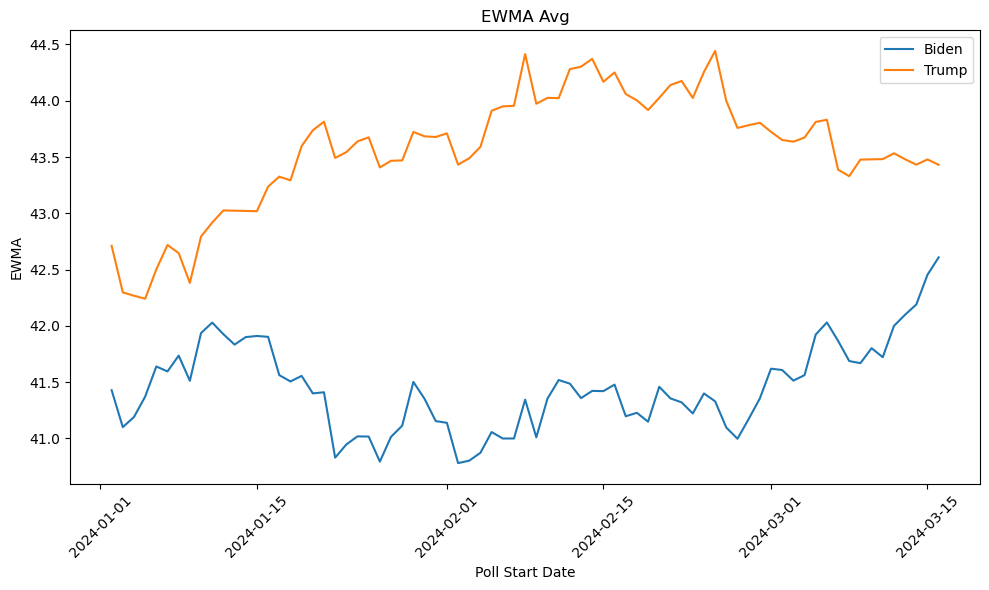

In [3]:
plt.figure(figsize=(10,6))
sns.lineplot(data=polling_cands, x='start_date', y='ewm_biden', label='Biden')
sns.lineplot(data=polling_cands, x='start_date', y='ewm_trump', label='Trump')
plt.title('EWMA Avg')
plt.xlabel('Poll Start Date')
plt.ylabel('EWMA')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()
plt.show()